In [16]:
import pandas as pd 
import numpy as np 
import os 
import seaborn as sb
from matplotlib import pyplot as plt

#### This notebook is used to analyze sugarscape price equillibrium with different agent types

In [17]:
for file in os.listdir("parquet"): 
    if os.listdir("parquet/" + file) == []: 
        print(file)
    

#### Replicate these variables from the GUI.py file. Could be called from this notebook but there would be too many print statements. Choose which variables to save in cols. 

In [18]:
model_attributes = ["population", "total_exchanges", "total_agents_created", "total_avg_price", "runtime",
                     "water_avg_price", "sugar_avg_price",# "total_variance", "water_variance", "sugar_variance",
                       "real_income_per_capital", "wealth_per_capita", "savings", "income",
                      "num_basicherders", "num_arbitrageurherders", "num_basicbasics", "num_arbitrageurbasics", 
                        "basicbasic_res_demand", "basicherder_res_demand", "arbitrageurbasic_res_demand", "arbitrageurherder_res_demand", "optimizer_MRS", "num_optimizers"]

runs = 15
pullable_cols = ["total_exchanges", "population",  "total_avg_price", "runtime", "wealth_per_capita", "water_avg_price", "sugar_avg_price", "avg_mutation_rate", "savings"]
cols = ["total_exchanges", "population",  "total_avg_price", "runtime", "wealth_per_capita", "water_avg_price", "sugar_avg_price", "avg_mutation_rate", "savings", "income", "agent_wealth", "real_income_per_capital"]

#### This code gets all of the run data for the selected cols

In [19]:
breed_sets = [
 #"basic",
 #'basic-arbitrageur',
 #'basic-optimizer-arbitrageur',
 'optimizer',
 #'optimizer-arbitrageur', 
  'optimizer-quick'
]
data_by_breeds = {}
for primary_breed_set in breed_sets:
    data_by_breeds[primary_breed_set] = {}
    for attr in pullable_cols: 
        data_by_breeds[primary_breed_set][attr] = pd.DataFrame()
        for run in range(runs): 
            data_by_breeds[primary_breed_set][attr][run] = pd.read_parquet("parquet/" + primary_breed_set + "/" + attr + "/" + str(run) + ".parquet")[attr]

FileNotFoundError: [Errno 2] No such file or directory: 'parquet/optimizer-quick/avg_mutation_rate/0.parquet'

In [ ]:
data_by_breeds

#### This code pulls the final price - the equillibrium - from each run 

In [6]:
price_data = {}
for breed_set in breed_sets: 
    price_data[breed_set] = []
    for run in range(runs): 
        price_data[breed_set].append(data_by_breeds[breed_set]["total_avg_price"][run][len(data_by_breeds[breed_set]["total_avg_price"][run]) - 1])

In [7]:
price_data = pd.DataFrame.from_dict(price_data)

#### This code gets the standard deviation of the price equillibriums by breed set

In [8]:
for breeds in price_data.keys(): 
    print(breeds + ": " + str(np.std(price_data[breeds])))

optimizer: 0.005551449367530923
optimizer-quick: 0.0029977893433749177


Text(0.5, 1.0, 'Figure 3: Distribution of Price Equillibria Across 30 Runs')

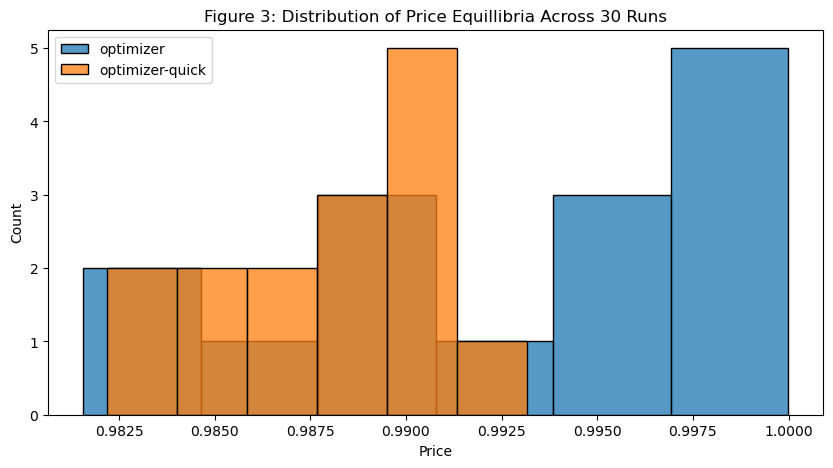

In [9]:
fig, ax = plt.subplots(figsize = (10, 5))
for i, breeds in enumerate(price_data.keys()): 
    sb.histplot(price_data[breeds], bins=6, color="C" + str(i), label=breeds, kde=False, ax=ax)
    
ax.legend()
plt.xlabel("Price")
plt.ylabel("Count")
plt.title("Figure 3: Distribution of Price Equillibria Across 30 Runs")


With current implementation, the spread in price equillibriums is significantly smaller with just optimizer agents.

In [10]:
data_by_breeds.keys()

dict_keys(['optimizer', 'optimizer-quick'])

In [11]:
for breed in breed_sets: 
    data_by_breeds[breed]["agent_wealth"] = pd.DataFrame()
    data_by_breeds[breed]["savings"] = pd.DataFrame()
    data_by_breeds[breed]["income"] = pd.DataFrame()
    data_by_breeds[breed]["real_income_per_capital"] = pd.DataFrame()
    for run in range(runs): 
        data_by_breeds[breed]["agent_wealth"][run] = data_by_breeds[breed]["wealth_per_capita"][run] * data_by_breeds[breed]["population"][run]
        data_by_breeds[breed]["savings"][run] = data_by_breeds[breed]["agent_wealth"][run].diff()
        data_by_breeds[breed]["income"][run] = data_by_breeds[breed]["population"][run] + data_by_breeds[breed]["savings"][run]
        data_by_breeds[breed]["real_income_per_capital"][run] = data_by_breeds[breed]["income"][run] / data_by_breeds[breed]["population"][run]
    for attr in cols: 
        data_by_breeds[breed][attr] = data_by_breeds[breed][attr].dropna()

Text(0.5, 1.0, 'Figure 2: Average Trading Price for All Goods, by Period, 30 Runs')

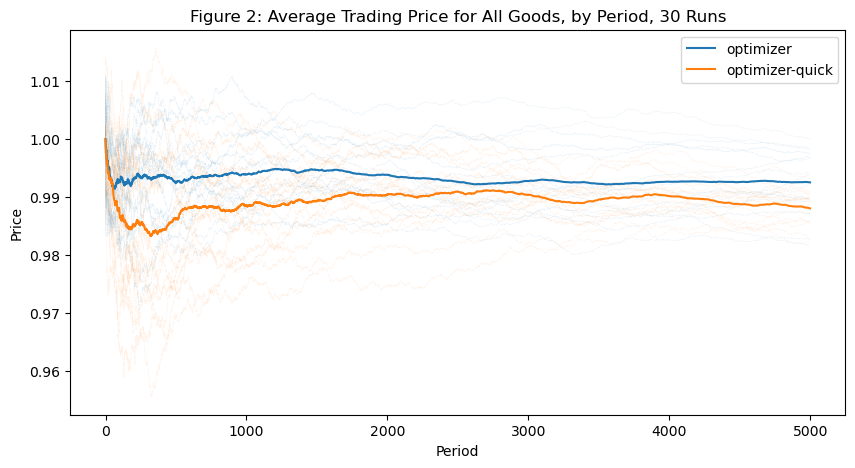

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))

for i, breed in enumerate(data_by_breeds.keys()): 
    sb.lineplot(data=data_by_breeds[breed]["total_avg_price"], alpha = 0.1, color="C"+str(i), palette=["C"+str(i)]*15, legend = False, lw=.5, ax=ax)
for i, breed in enumerate(data_by_breeds.keys()): 
    sb.lineplot(data=data_by_breeds[breed]["total_avg_price"].mean(axis=1), alpha = 1, color="C"+str(i), label=breed, ax=ax)
    #sb.lineplot(data=data_by_breeds[breed]["water_avg_price"], alpha = 0.3, color="C"+str(i), legend = False, ax=ax)
    #sb.lineplot(data=data_by_breeds[breed]["water_avg_price"].mean(axis=1), alpha = 1, color="C"+str(i), label=None, ax=ax)
    #sb.lineplot(data=data_by_breeds[breed]["sugar_avg_price"], alpha = 0.3, color="C"+str(i), legend = False, ax=ax)
    #sb.lineplot(data=data_by_breeds[breed]["sugar_avg_price"].mean(axis=1), alpha = 1, color="C"+str(i), label=None, ax=ax)
plt.xlabel("Period")
plt.ylabel("Price")
plt.title("Figure 2: Average Trading Price for All Goods, by Period, 30 Runs")

Text(0.5, 1.0, 'Figure 1: Runtime per Agent, by Period, 30 Runs')

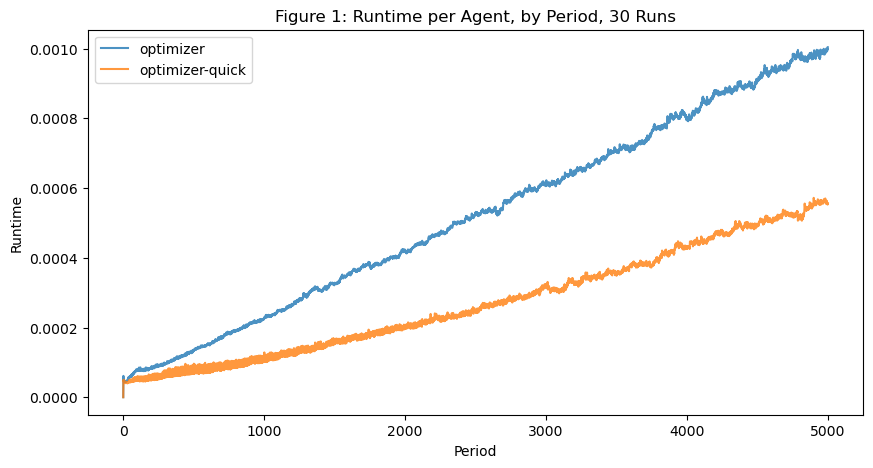

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))

for i, breed in enumerate(list(data_by_breeds.keys())): 
   # sb.lineplot(data=(data_by_breeds[breed]["runtime"] / data_by_breeds[breed]["population"]), alpha = 0.1, color="C"+str(i), palette=["C"+str(i)]*30, legend = False, ax=ax)
    sb.lineplot(data=(data_by_breeds[breed]["runtime"][data_by_breeds[breed]["runtime"] < 1] / data_by_breeds[breed]["population"][data_by_breeds[breed]["runtime"] < 1]).mean(axis=1),  alpha = 0.8, color="C"+str(i), label=breed, ax=ax)
    #sb.lineplot(data=data_by_breeds[breed]["water_avg_price"], alpha = 0.3, color="C"+str(i), legend = False, ax=ax)
    #sb.lineplot(data=data_by_breeds[breed]["water_avg_price"].mean(axis=1), alpha = 1, color="C"+str(i), label=None, ax=ax)
    #sb.lineplot(data=data_by_breeds[breed]["sugar_avg_price"], alpha = 0.3, color="C"+str(i), legend = False, ax=ax)
    #sb.lineplot(data=data_by_breeds[breed]["sugar_avg_price"].mean(axis=1), alpha = 1, color="C"+str(i), label=None, ax=ax)
plt.xlabel("Period")
plt.ylabel("Runtime")
plt.title("Figure 1: Runtime per Agent, by Period, 30 Runs")

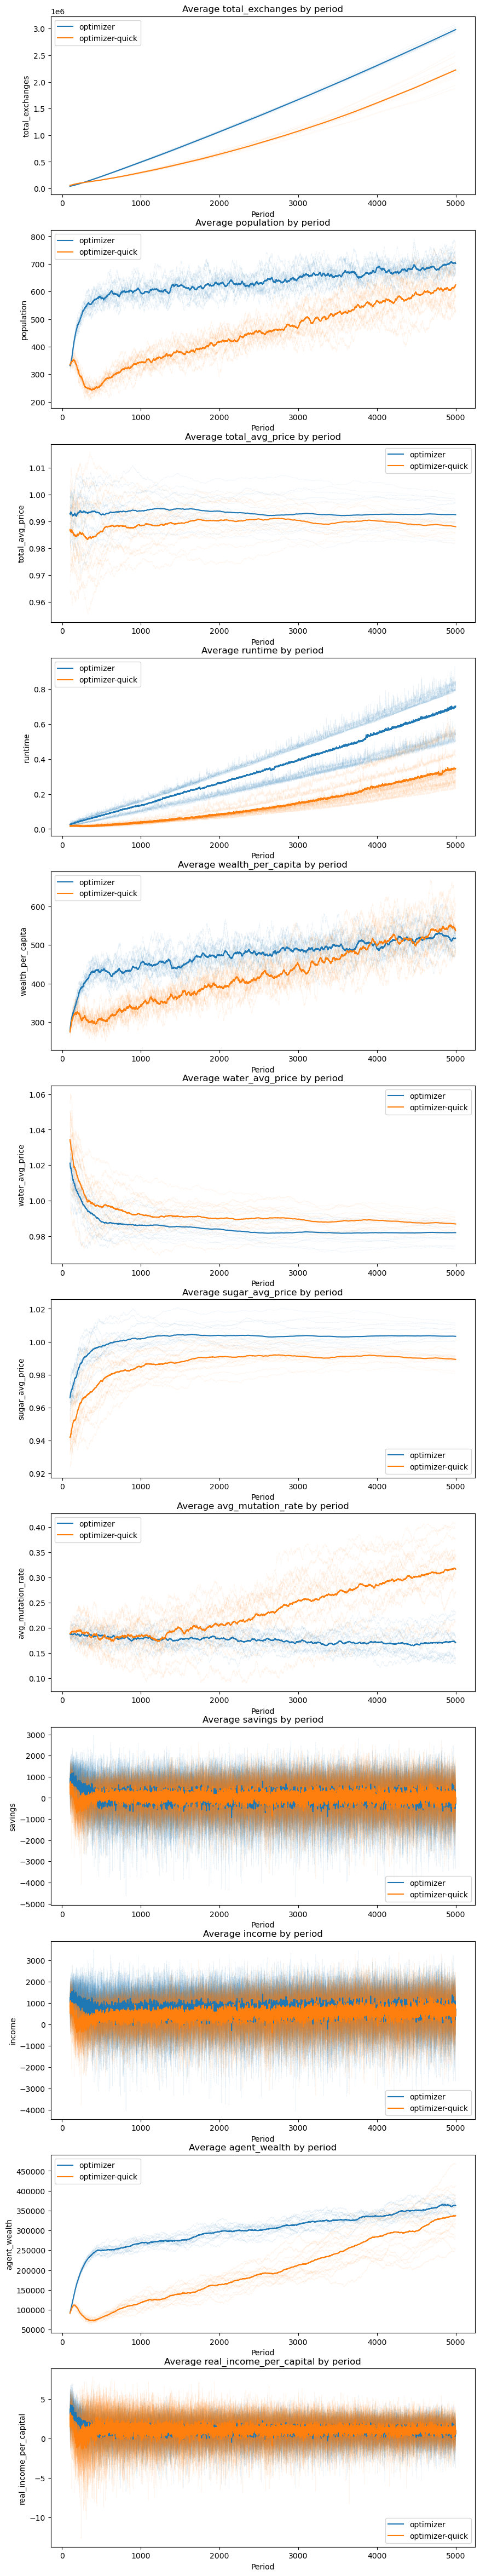

In [14]:
fig, axs = plt.subplots(len(cols), 1, figsize=(10, 5*len(cols)))

for j, attr in enumerate(cols): 
                       
    for i, breed in enumerate(data_by_breeds.keys()): 
        sb.lineplot(data=data_by_breeds[breed][attr][100:],
                    alpha = 0.1,
                    color="C"+str(i),
                    palette=["C"+str(i)]*15,
                    legend = False,
                    lw=.5,
                    ax=axs[j])
    for i, breed in enumerate(data_by_breeds.keys()): 
        sb.lineplot(data=data_by_breeds[breed][attr][100:].mean(axis=1), alpha = 1, color="C"+str(i), label=breed, ax=axs[j])
        #sb.lineplot(data=data_by_breeds[breed]["water_avg_price"], alpha = 0.3, color="C"+str(i), legend = False, ax=ax)
        #sb.lineplot(data=data_by_breeds[breed]["water_avg_price"].mean(axis=1), alpha = 1, color="C"+str(i), label=None, ax=ax)
        #sb.lineplot(data=data_by_breeds[breed]["sugar_avg_price"], alpha = 0.3, color="C"+str(i), legend = False, ax=ax)
        #sb.lineplot(data=data_by_breeds[breed]["sugar_avg_price"].mean(axis=1), alpha = 1, color="C"+str(i), label=None, ax=ax)
    axs[j].set_xlabel("Period")
    axs[j].set_ylabel(attr)
    axs[j].set_title(f"Average {attr} by period")

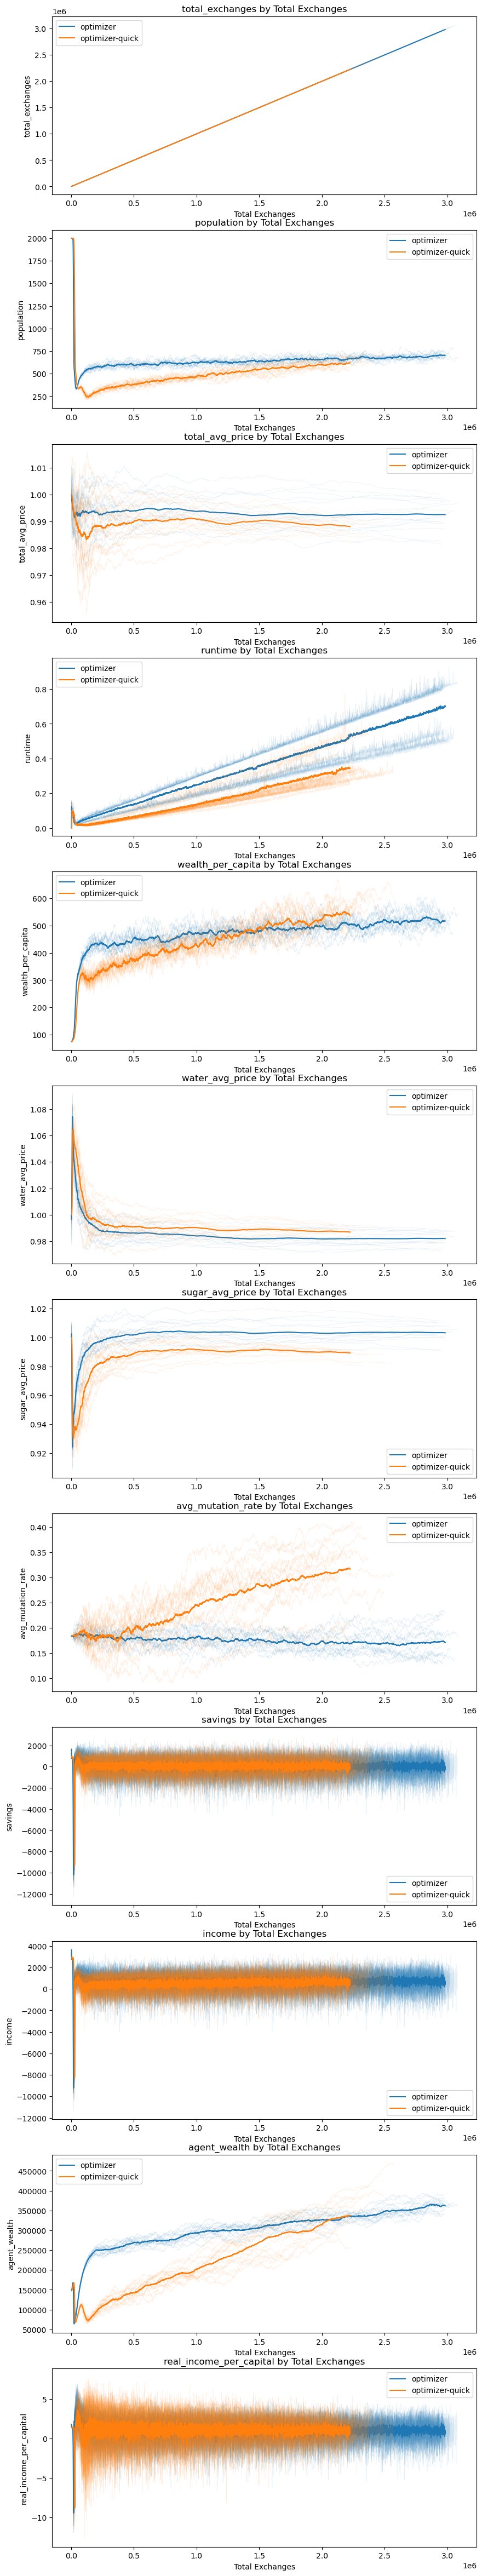

In [15]:
fig, axs = plt.subplots(len(cols), 1, figsize=(10,len(cols)*5))

for i, attr in enumerate(cols):
    for j, breed in enumerate(breed_sets): 
        te = pd.DataFrame.from_dict(data_by_breeds[breed]["total_exchanges"])
        attr_df = pd.DataFrame.from_dict(data_by_breeds[breed][attr])
    
        for run in range(runs): 
            sb.lineplot(x = te[run], y = attr_df[run], alpha=0.1,color = f"C{j}", palette = [f"C{j}"]*runs, lw=.5, ax=axs[i])
    
        sb.lineplot(x=te.mean(axis=1), y=attr_df.mean(axis=1), color = f"C{j}", label = breed, ax=axs[i])
    axs[i].set_xlabel("Total Exchanges")
    axs[i].set_ylabel(attr)
    axs[i].set_title(f"{attr} by Total Exchanges")

<AxesSubplot:>

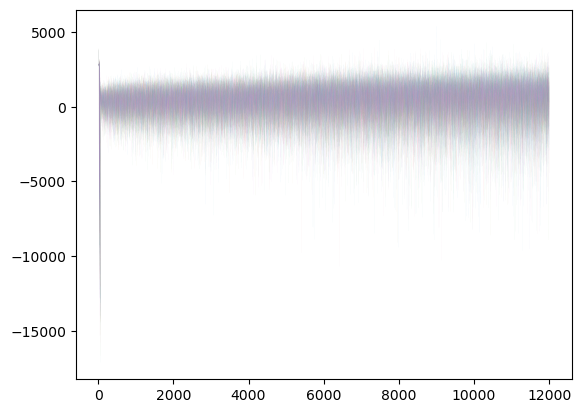

In [32]:
sb.lineplot(data=data_by_breeds["basic"]["income"], alpha = 1, lw=.01, legend=False)